In [52]:
import pandas as pd
from sklearn.preprocessing import RobustScaler,StandardScaler,OneHotEncoder,TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [53]:
df = pd.read_csv("train (4).csv")

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38199 entries, 0 to 38198
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            38199 non-null  int64  
 1   brand         38199 non-null  int64  
 2   model_id      38199 non-null  int64  
 3   year          38199 non-null  int64  
 4   transmission  38199 non-null  object 
 5   fuelType      38199 non-null  object 
 6   mileage       38199 non-null  int64  
 7   tax           38199 non-null  int64  
 8   mpg           38199 non-null  float64
 9   engineSize    38199 non-null  float64
 10  price         38199 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 3.2+ MB


In [55]:
df.head()

,id,brand,model_id,year,transmission,fuelType,mileage,tax,mpg,engineSize,price
0,53394,3,17,2019,Automatic,Diesel,7148,145,50.4,2.0,29990
1,27771,2,44,2018,Manual,Diesel,19254,150,60.1,2.0,15750
2,22402,2,33,2017,Manual,Petrol,13275,145,60.1,1.0,10400
3,29944,2,32,2018,Manual,Petrol,20106,145,65.7,1.0,10595
4,47602,3,53,2013,Manual,Petrol,61984,125,51.4,1.2,6191


In [56]:
df.drop('id',axis=1,inplace=True)

In [57]:
X = df.drop('price',axis=1)
y = df.price

xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state=42,train_size=0.8)

In [58]:
num_cols = xtrain.select_dtypes(include='number').columns
obj_cols = xtrain.select_dtypes(include='object').columns

<Axes: >

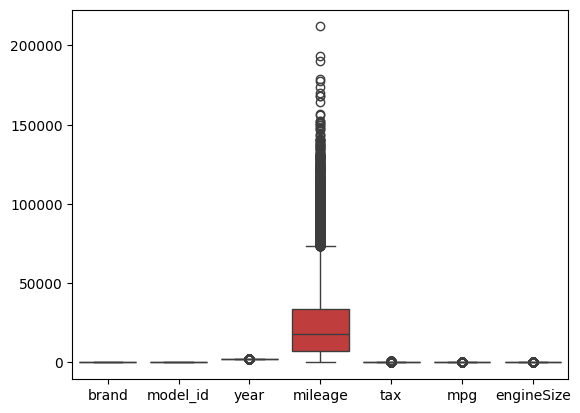

In [59]:
sns.boxplot(df[num_cols])

In [60]:
DecisionTreeRegressor()

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [61]:
preprocessing = ColumnTransformer(
    transformers=[
        ('num_preprocessing',RobustScaler(),num_cols),
        ('obj_preprocessing',OneHotEncoder(),obj_cols),
    ]
)
pipline_RFR = Pipeline(
    steps=[
        ('preprocessing',preprocessing),
        ('model',RandomForestRegressor())
    ]
)
pipline_BR = Pipeline(
    steps=[
        ('preprocessing',preprocessing),
        ('model',BaggingRegressor(estimator=None))
    ]
)
'''.
RandomForestRegressor:-

By default uses  - n_estimators: Int = 100

base estimator is DecisionTree

if max_features is 2(total 5 features)
randomly selects 2 and selects a feature randomly from max_features=2
example 
feature1,feature2,feature3,feature4,feature5
max_features=2
randomly selects 2 = > feature1,feature4
selected feature for rootnode is feature1(random)
'''
''' .

BaggingRegressor:-
By default uses  - n_estimators: Int = 10
Base estimator is None by default and we can use DecisionTree,SVM,KNN,Naivebayes(BaggingClassifier)

if max_features is 2(total 5 features)
randomly selects 2 and checks which feature (IG/Gini Impurity) is best

max_features: float = 1(all features)
'''

' .\n\nBaggingRegressor:-\nBy default uses  - n_estimators: Int = 10\nBase estimator is None by default and we can use DecisionTree,SVM,KNN,Naivebayes(BaggingClassifier)\n\nif max_features is 2(total 5 features)\nrandomly selects 2 and checks which feature (IG/Gini Impurity) is best\n\nmax_features: float = 1(all features)\n'

In [62]:
pipline_BR.fit(xtrain,ytrain)

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_preprocessing', ...), ('obj_preprocessing', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [63]:
pipline_RFR.fit(xtrain,ytrain)

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_preprocessing', ...), ('obj_preprocessing', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [64]:
DecisionTreeRegressor()

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [65]:
pipline_RFR.score(xtrain,ytrain)

0.993328454971816

In [66]:
pipline_RFR.score(xtest,ytest)


0.9614204141033861

In [67]:
rfr = pipline_RFR.named_steps['model']
rfr.fit(xtrain[num_cols],ytrain)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False
